In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
X = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = train_data.Survived

In [4]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm

In [18]:
clf_svm = svm.SVC(gamma='auto', probability=True)

In [19]:
clf_svm.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred_smv = clf_svm.predict(X_test)

In [21]:
clf_svm.score(X_test, y_test)

0.6813559322033899

In [22]:
precision_score(y_test, y_pred_smv)

0.6666666666666666

In [23]:
recall_score(y_test, y_pred_smv)

0.43333333333333335

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_smv)

In [26]:
conf_matrix

array([[149,  26],
       [ 68,  52]], dtype=int64)

In [27]:
y_pred_prob = clf_svm.predict_proba(X_test)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

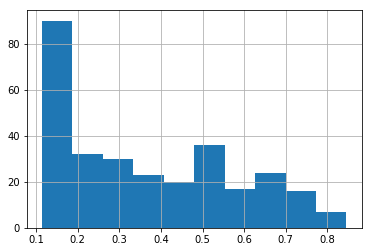

In [30]:
pd.Series(y_pred_prob[:,1]).hist()

In [34]:
y_pred = np.where(y_pred_prob[:,1]>0.2, 1, 0)

In [35]:
precision_score(y_test, y_pred)

0.5477386934673367

In [36]:
recall_score(y_test, y_pred)

0.9083333333333333

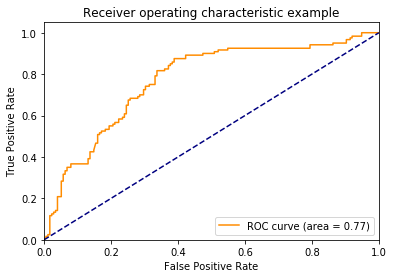

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()